 **Time Series Analysis in Python**

I analyse the time series dataset (Parking Birmingham) downloaded from the UCI machine learning repository.

In [17]:
# import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
import itertools

In [18]:
#importing the data set

df = pd.read_csv('Timeseries.csv')
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [19]:
# shape of the data set
df.shape

(35717, 4)

**Dataset description**

I have used the Parking Birmingham Data Set for this project. The data set is about the car parking in Birmingham city in UK. The data shows the occupancy rates (8:00 to 16:30) of the cars from 2016/10/04 to 2016/12/19. The data set contains 35717 number of instances and 4 attributes.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SystemCodeNumber  35717 non-null  object
 1   Capacity          35717 non-null  int64 
 2   Occupancy         35717 non-null  int64 
 3   LastUpdated       35717 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [21]:
#Converting it to date time
df['LastUpdated'] = pd.to_datetime(df['LastUpdated'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SystemCodeNumber  35717 non-null  object        
 1   Capacity          35717 non-null  int64         
 2   Occupancy         35717 non-null  int64         
 3   LastUpdated       35717 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.1+ MB


In [23]:
#dividing the column into two columns of date and time
df['Date'] = df['LastUpdated'].dt.date
df['Time'] = df['LastUpdated'].dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SystemCodeNumber  35717 non-null  object        
 1   Capacity          35717 non-null  int64         
 2   Occupancy         35717 non-null  int64         
 3   LastUpdated       35717 non-null  datetime64[ns]
 4   Date              35717 non-null  object        
 5   Time              35717 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.6+ MB


In [24]:
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,Date,Time
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,2016-10-04,07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,2016-10-04,08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,2016-10-04,08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,2016-10-04,09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,2016-10-04,09:59:48


In [25]:
#removing the extra columns
cols = ['SystemCodeNumber','Capacity', 'LastUpdated']
df.drop(cols, axis = 1,inplace = True)

In [26]:
df.head()

,Occupancy,Date,Time
0,61,2016-10-04,07:59:42
1,64,2016-10-04,08:25:42
2,80,2016-10-04,08:59:42
3,107,2016-10-04,09:32:46
4,150,2016-10-04,09:59:48


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Occupancy  35717 non-null  int64 
 1   Date       35717 non-null  object
 2   Time       35717 non-null  object
dtypes: int64(1), object(2)
memory usage: 837.2+ KB


In [28]:
#converting again to the date type

df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Occupancy  35717 non-null  int64         
 1   Date       35717 non-null  datetime64[ns]
 2   Time       35717 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 837.2+ KB


When working with time-series data in Python we should always set dates as the index. So, I will set Date column as the index of the dataframe.

In [29]:
# Indexing with timeseries data
df.set_index('Date',inplace = True)
df.index

DatetimeIndex(['2016-10-04', '2016-10-04', '2016-10-04', '2016-10-04',
               '2016-10-04', '2016-10-04', '2016-10-04', '2016-10-04',
               '2016-10-04', '2016-10-04',
               ...
               '2016-12-19', '2016-12-19', '2016-12-19', '2016-12-19',
               '2016-12-19', '2016-12-19', '2016-12-19', '2016-12-19',
               '2016-12-19', '2016-12-19'],
              dtype='datetime64[ns]', name='Date', length=35717, freq=None)

In [30]:
# resampling the data with mean
y= df['Occupancy'].resample('D').mean()
y.head(10)


,Occupancy
Date,
2016-10-04,655.543651
2016-10-05,655.185185
2016-10-06,636.942130
2016-10-07,576.282407
2016-10-08,428.036232
2016-10-09,283.159091
2016-10-10,582.358796
2016-10-11,646.402778
2016-10-12,671.660714


In [31]:
y.isnull().sum()
# this command shows the missing values

4

In [32]:
# we will be replacing the missing values with bfill which take the non-nan values which are before the nan values
y.fillna(method = 'bfill',inplace = True)

<ipython-input-32-f73b3320b109>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y.fillna(method = 'bfill',inplace = True)


In [33]:
y.isnull().sum()

0

**Three terms to check when visualising the Time Series data**





*   Seasonality: It refers to the regular, periodic fluctuations in a time series that repeat over fixed period, such as daily, monthly yearly etc.
*   Trend : It refers to long term movement in the time series that shows a generla direction (slope) in which the data is moving. it can be upward,downward ro flat.
*   Noise: are there any outliers or missing values that are not consistent with the time series data







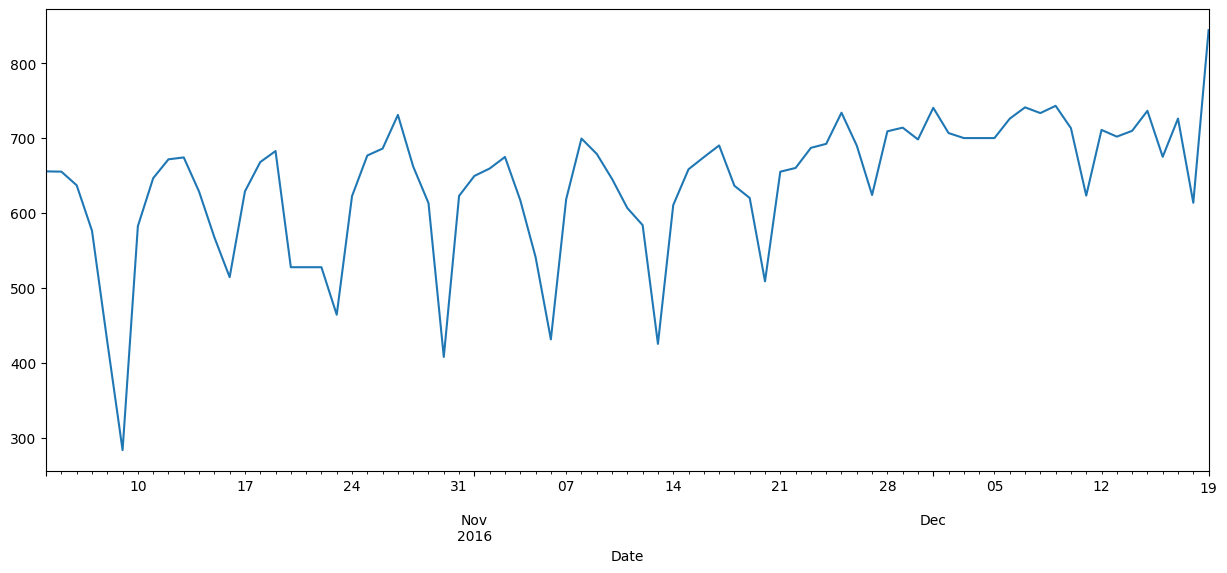

In [34]:
#visualise the time series data
y.plot(figsize = (15,6))
plt.show()

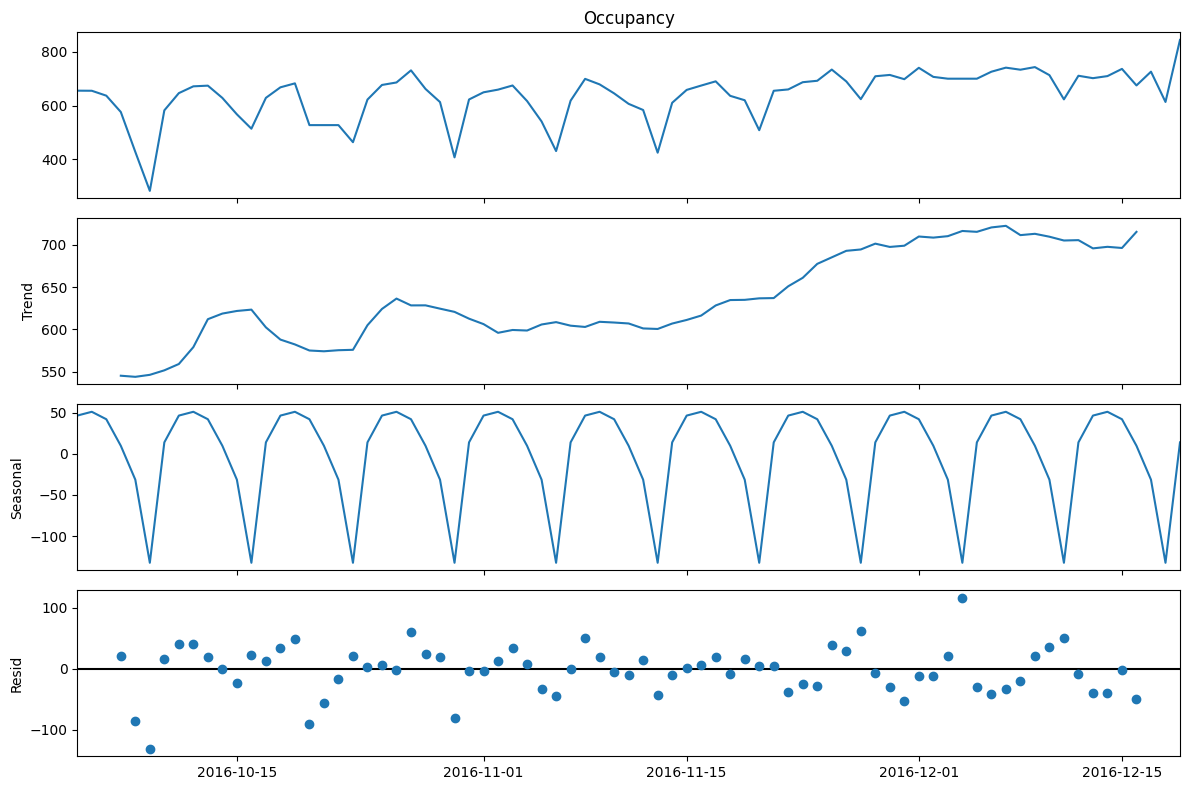

In [35]:
#Seasonal Decomposition : divides the time series into three components (Trend , Seasonality , Residual/Noise)
from pylab import rcParams

rcParams['figure.figsize'] = 12,8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

**ARIMA Model**
: Auto Reggressive Integrated  Moving Average

To check IF ARIMA model can be applied we need to check if the model is stationary, For that we can use DIckey-Fuller test (If p >0.05, the data is not stationary) then we move to differencing.

we need to find the values P,D,Q

Auto-Regressiive gives the value for P i.e P is the number of Autoregressive terms (AR part)

D is the degree of differencing (I part) i.e number of times the data have had past values subtracted

Q is the number of moving average terms (MA part)


In [36]:
# Parameter selection for ARIMA model

import itertools
p=d=q=range(0,2)
pdq= list(itertools.product(p,d,q))
print(pdq)
# Seasonal ARIMA with 4 steps
seasonal_pdq = [(x[0],x[1],x[2],4) for x in list(itertools.product(p,d,q))]
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[2]))

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 1, 0) x (0, 1, 0, 4)


**Grid Search or Hyperparameter Optimization**

the stats model will be compared using the above parameter on Akaike Information Criterion(AIC)

IN AIC, how well the model fits the data while talking account the overall complexibility of the model. Less number of features, less complex and lower the AIC score i.e. the better fit

In [37]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 4)4 - AIC:1201.1161736184724
ARIMA(0, 0, 0)x(0, 0, 1, 4)4 - AIC:1070.4713747723176
ARIMA(0, 0, 0)x(0, 1, 0, 4)4 - AIC:908.3545887839413
ARIMA(0, 0, 0)x(0, 1, 1, 4)4 - AIC:803.2581126835688
ARIMA(0, 0, 0)x(1, 0, 0, 4)4 - AIC:924.6196666957659
ARIMA(0, 0, 0)x(1, 0, 1, 4)4 - AIC:853.5434245581921
ARIMA(0, 0, 0)x(1, 1, 0, 4)4 - AIC:814.4338079001363
ARIMA(0, 0, 0)x(1, 1, 1, 4)4 - AIC:800.081771972061
ARIMA(0, 0, 1)x(0, 0, 0, 4)4 - AIC:1094.882143641644
ARIMA(0, 0, 1)x(0, 0, 1, 4)4 - AIC:976.9639818733198
ARIMA(0, 0, 1)x(0, 1, 0, 4)4 - AIC:872.8860317888696
ARIMA(0, 0, 1)x(0, 1, 1, 4)4 - AIC:782.6603279215703
ARIMA(0, 0, 1)x(1, 0, 0, 4)4 - AIC:906.3873337035686
ARIMA(0, 0, 1)x(1, 0, 1, 4)4 - AIC:833.88394863685
ARIMA(0, 0, 1)x(1, 1, 0, 4)4 - AIC:814.2499614932641
ARIMA(0, 0, 1)x(1, 1, 1, 4)4 - AIC:782.0113593498426
ARIMA(0, 1, 0)x(0, 0, 0, 4)4 - AIC:888.3346223710352
ARIMA(0, 1, 0)x(0, 0, 1, 4)4 - AIC:835.7013672481057
ARIMA(0, 1, 0)x(0, 1, 0, 4)4 - AIC:900.36199411

In [38]:
# Fitting an ARIMA Time Series Model
model = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = model.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2699      0.123      2.202      0.028       0.030       0.510
ma.L1         -1.0000   1470.957     -0.001      0.999   -2884.022    2882.022
ma.S.L4       -1.0000   1470.867     -0.001      0.999   -2883.846    2881.846
sigma2      4719.6157      0.014   3.37e+05      0.000    4719.588    4719.643


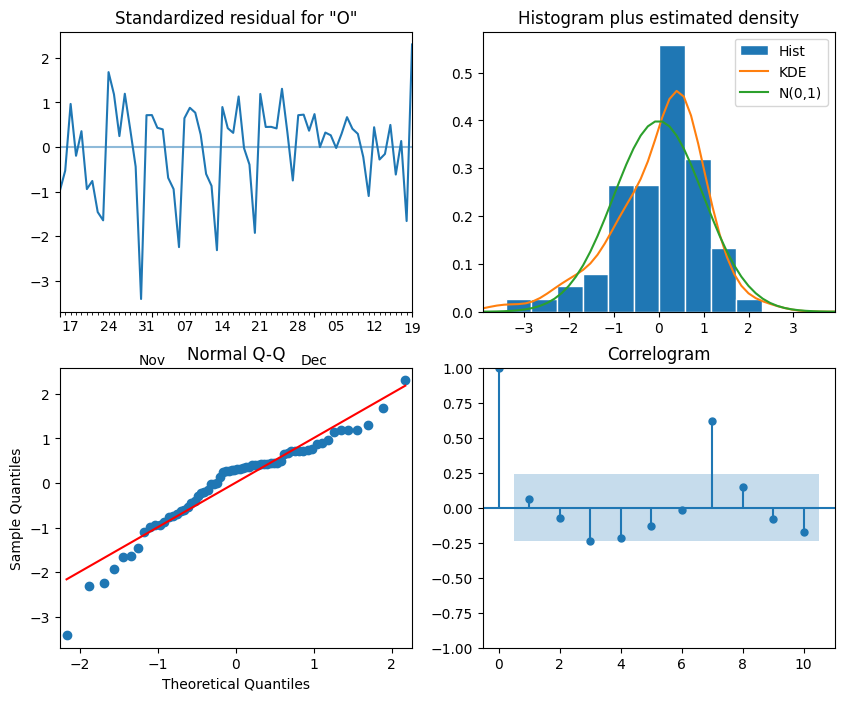

In [39]:
results.plot_diagnostics(figsize= (10,8))
plt.show()

In the top right plot, we can see that the red KDE line does not follow with the N(0,1) line. This shows that the residuals are not normally distributed.

Although, the model does not produce a satisfactory fit to the data, but I will use the same model to illustrate the process of validating and producing the forecasts for demonstration purposes.

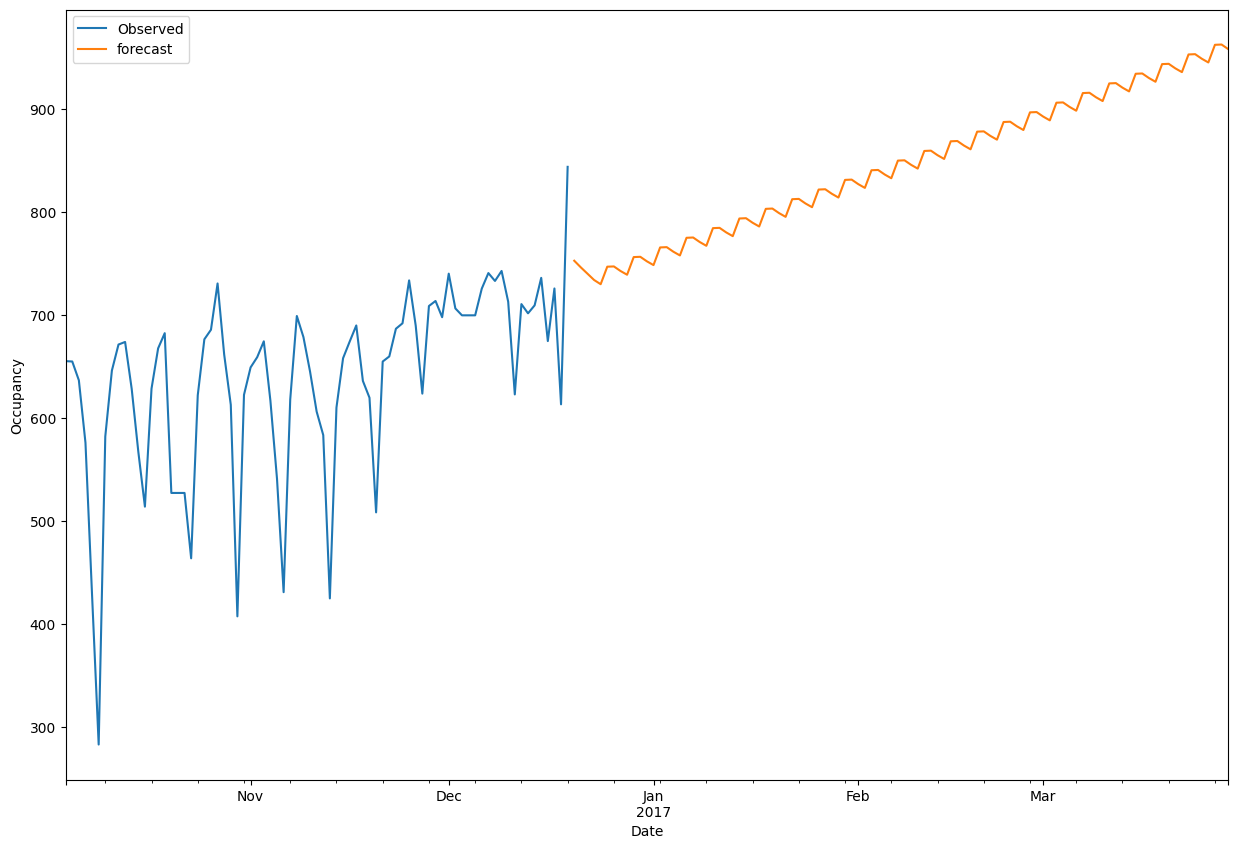

In [40]:
pred_uc = results.get_forecast(steps = 100)

pred_ci = pred_uc.conf_int()

ax = y.plot(label ='Observed', figsize = (15,10))

pred_uc.predicted_mean.plot(ax=ax, label= 'forecast')

ax.set_xlabel('Date')
ax.set_ylabel('Occupancy')

plt.legend()
plt.show()

**Conclusion**


In this we implemented a time series ARIMA model to predict occupancy rates of car parks in parking Birmingham data set. The model shows it is going to increase at a steady rate as we progress further in time.As we forecast further into the future, we become less confident in our values.
